# Analytical Computing — Inleveropdrachten Lineaire Algebra

De inleveropdracht bestaat uit vier onderdelen, waarvan de eerste twee in deze Jupyter Notebook zitten. Per week lever je een deel in, waarop je vervolgens feedback krijgt. Je kan deze feedback gebruiken om je werk te verbeteren, aan het einde van het blok wordt deze Notebook als portfolio beoordeeld voor je uiteindelijke cijfer.

Iedere weekopdracht is verdeeld in een aantal deelopdrachten, waarbij je doorgaans iets moet programmeren om de geleerde wiskunde toe te passen. Daarnaast zijn er formatieve oefen-opdrachten waarbij je iets met de hand uit werkt, deze zijn in een ander notebook te vinden en kijken zichzelf na. Bij de code-opdrachten zal in de meeste gevallen aan het einde een test staan waarmee je kan zien of je code doet wat het moet doen. Iedere weekopdracht wordt afgesloten met een checkpoint, waar alle testen nog een keer herhaald worden. Als dit allemaal goed gaat kun je je werk op Canvas inleveren door een link naar je repository bij de juiste weekopdracht in te leveren. 

Voor je begint: voer het eerste code-blok uit voor alle imports.

## Gebruik
In Jupyter kan je code per cel uitvoeren. Deze cel is een tekstcel, als je deze uitvoert gebeurt er in principe niets. Je kunt wel dubbelklikken op de cell om de tekst aan te kunnen passen (dit zul je moeten doen bij de opdrachten waarbij je geen code maar tekst/formules moet schrijven). Als je de cel vervolgens uitvoert komt deze er weer als opgemaakte tekst uit te zien.

Als je een code-cell uitvoert krijg je de uitvoer eronder te zien. Soms kan het zijn dat code niet uit wil voeren, zelfs code die al gegeven is. De meest gebruikelijke oorzaak is dat je een eerder code blok niet hebt uitgevoerd, waardoor Python functies of variabelen niet kan vinden. Loop de Notebook altijd van boven naar beneden door en voer in principe alles uit. Als je Jupyter afsluit en later verder gaat zal de uitvoer nog zichtbaar zijn, maar het effect van de code is niet bewaard gebleven. Je zal dan dus alle codeblokken tot waar je gebleven was opnieuw uit moeten voeren, van boven naar beneden. Gebruik de Run-knop in de toolbar of shift+enter om een blok uit te voeren.

## Good Practice (AKA voorkomen dat je werk het ineens niet meer doet)
Uitgevoerde code in een andere cel blijft in het geheugen, dus als je deze code verwijdert zie je niet meteen of je hele Notebook nog werkt. Let er daarom op als je Notebook op wilt schonen, de code soms blijft werken tot een herstart. **Als je docent de code nakijkt, start deze ook zonder alle verwijderde maar wel uitgevoerde code!** Om veilig code te verwijderen, kopieer het naar een ander document, verwijder het uit de Notebook en doe een *Restart en Run All*. Als alles nog werkt was de code niet nodig, zo niet moet je nog even goed kijken wat je weg aan het halen bent! Hanteer de volgende workflow:
- Doe regelmatig een save, en een *Kernel/Restart en Run All*.
- Ruim oude code op, en test met een *Kernel/Restart en Run All* dat alles blijft werken.
- Als alles hierna nog werkt is het mogelijk tijd voor een Git commit.


## FAQ
**Q:** Het werkt niet! Jupyter is stom! (en ik heb de sectie "Gebruik" niet gelezen)

**A:** Lees de sectie gebruik hierboven. 

**Q:** Functies / variabelen worden niet gevonden, en/of oude tests geven in een keer lange gecompliceerde errors.

**A:** Herstart je kernel en voer je code van boven naar beneden uit (*Restart en Run All* kan hierbij helpen). Waarschijnlijk heb je in de tussentijd Jupyter Notebook (of zelfs alleen je Kernel, het ding dat de code uitvoert) herstart, waardoor oude code niet meer geladen is. 

**Q:** Ik krijg errors dat een functie niet de verwachte parameters heeft, of iets van die strekking.

**A:** Mogelijk heb je een geïmporteerde functie overschreven. Herstart de kernel en voer de eerste cel opnieuw uit voor de imports. Mogelijk moet je andere cellen ook opnieuw uitvoeren, als je code functies of variabelen uit de andere cel gebruikt.

**Q:** Hoe lever ik mijn werk in?

**A:** Zie [de uitleg bij Checkpoint Alfa](#Checkpoint-Alfa).

**Q:** Wanneer moet ik inleveren?

**A:** Zie [Canvas](https://canvas.hu.nl/courses/7473/assignments).

## Units
- [Alfa](#Unit-Alfa) ([checkpoint](#Checkpoint-Alfa))
- [Bravo](#Unit-Bravo) ([checkpoint](#Checkpoint-Bravo))

In [2]:
import ac_tests
from ac_latex import latex_msquare
import numpy as np
from IPython.display import YouTubeVideo
from ac_exceptions import DimensionError, NonInvertibleError

# Unit Alfa

## Matrices en Vectoren
Deze week gaan we aan de slag met vectoren en matrices. Bekijk hiervoor eerst de video's die op Canvas gelinkt staan. Het eerste deel van deze week bestaat uit het omzetten van de wiskundige structuren in Python code. In tegenstelling tot de meeste video's, waar vectoren meestal uit 2 of 3 elementen bestaan (en matrices vaak $2\times 2$ of $3 \times 3$ zijn) kijken wij naar het meer algemene geval, waar de lengte van een vector alles kan zijn. Vectoren met lengte 2 en 3 worden veel gebruikt in graphics en natuurkunde omdat deze mooi overeen komen met 2D en 3D werelden. 

In AI worden vectoren gebruikt om data op te slaan en te bewerken, waarbij ieder getal overeen komt met een input waarde: als je bijvoorbeeld een huizenprijs wil voorspellen aan de hand van het aantal vierkante meters oppervlakte, het aantal vierkante meters tuin, de afstand tot het station en de afstand tot een supermarkt hebben we 4 input variabelen, dus 4 "dimensies". Bij neurale netwerken die met afbeeldingen werken is iedere pixel vaak een inputwaarde, en heb je voor een plaatje van 100 bij 100 dus 10000-dimensionale vectoren nodig.

In deze opdrachten werken we niet met 10000-dimensionale vectoren, maar beperken we ons tot maximaal 6 dimensies. Het is belangrijk om er meteen aan te wennen dat vectoren groter kunnen zijn dan we kunnen plotten, maar extreem hoge aantallen dimensies maken het uiteindelijk voor meer rekenwerk en minder overzichtelijk.

Aan het einde van deze week hebben we onze eigen functies geschreven voor lineaire algebra, en zullen we deze gebruiken om een simpel getraind neuraal netwerk zonder activatiefunctie door te rekenen.

### $\to$ Bekijk hier de theorie en formatieve opdrachten over negatieven en sommen

## Opdracht 0 (15p)
Maak een functie die twee vectoren bij elkaar optelt. De vectoren zijn Numpy arrays. Het is de bedoeling dat je deze opgave zelf oplost, en dus geen gebruik maakt van de Numpy functionaliteit om twee arrays op te tellen.
Gebruik onderstaande functie als basis voor je oplossing; in de cel eronder staan een paar test-cases, waaraan je kunt zien of je oplossing correct is.
Als de gebruiker twee vectoren van verschillend formaat meegeeft moet Python een `DimensionError` geven; dit kan met `raise DimensionError("Vectors niet hetzelfde formaat")`.

In [733]:
"""De functie bekijkt eerst of de 2 arrays van dezelfde grootte zijn, als dat dat is gaat de functie
door de 2 arrays heen. Het telt elke paar op in volgorde en zet de opgetelde uitkomst in lijst 'x'.
Deze lijst wordt dan terug gegeven"""
def vector_addition(u: np.ndarray, v: np.ndarray) -> np.ndarray: # TODO
    if u.shape != v.shape:
        raise DimensionError("Vectors niet hetzelfde formaat")
    else:
        x = []
        for i in range(len(u)):
            x.append(u[i] + v[i])
        return np.array(x)

In [734]:
ac_tests.test_vector_addition(vector_addition)

### Tests
| **Test** | **Betekenis** |
|---:|:---|
| `test_valid_addition` | $\vec u + \vec v$ klopt  |
| `test_additive_unit` | $\vec u + \vec 0 = \vec u$ ($\vec 0$ is de vector van de juiste lengte met alleen maar 0 waardes) |
| `test_additive_unit2` | $\vec 0 + \vec u = \vec u$ |
| `test_test_invalid_addition` | $\vec v + \vec w$ geeft een `DimensionError` als de dimensies niet kloppen |


test_additive_unit (ac_tests.test_vector_addition.<locals>.TestVectorAddition) ... ok
test_additive_unit_2 (ac_tests.test_vector_addition.<locals>.TestVectorAddition) ... ok
test_invalid_addition (ac_tests.test_vector_addition.<locals>.TestVectorAddition) ... ok
test_numpy_array (ac_tests.test_vector_addition.<locals>.TestVectorAddition) ... ok
test_valid_addition (ac_tests.test_vector_addition.<locals>.TestVectorAddition) ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.005s

OK


## Opdracht 1 (15p)
Maak een functie die de negatieve van een vector geeft. Je mag niet geen gebruik maken van de Numpy functionaliteit om `-` op een hele array toe te passen.

Ook hier moet je gebruik maken van het gegeven functie-template, en zijn test-functies beschikbaar. Voor alle volgende opdrachten geldt hetzelfde, tenzij anders aangegeven. Ook zal niet bij iedere opdracht expliciet vermeld worden dat je niet de ingebouwede Numpy-functionaliteit mag toepassen, dit wordt vanaf hier als bekend verondersteld.

In [735]:
def negative_of_vector(v: np.ndarray) -> np.ndarray: # TODO
    negv = []
    for i in range(0,len(v)):
        negv.append(-v[i]) 
    negv = np.array(negv)
    return negv

In [736]:
ac_tests.test_negative_of_vector(negative_of_vector, vector_addition)

### Tests
| **Test** | **Betekenis** |
|---:|:---|
| `test_negative_of_vector` | $-\vec v$ klopt  |
| `test_negative_of_zero` | $- \vec 0 = \vec 0$ (de vector van de juiste lengte met alleen maar 0 waardes) |
| `test_sum_vector_negative_is_zero` | $\vec v + (-\vec v) = \vec 0$ |


test_negative_of_vector (ac_tests.test_negative_of_vector.<locals>.TestNegativeOfVector) ... ok
test_negative_of_zero (ac_tests.test_negative_of_vector.<locals>.TestNegativeOfVector) ... ok
test_numpy_array (ac_tests.test_negative_of_vector.<locals>.TestNegativeOfVector) ... ok
test_sum_vector_negative_is_zero (ac_tests.test_negative_of_vector.<locals>.TestNegativeOfVector) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.002s

OK


### $\to$ Bekijk hier de theorie en formatieve opdrachten over vermenigvuldigen en lineaire combinaties

## Opdracht 2 (15p)
Maak een functie die de scalaire vermenigvuldiging van een scalar en een vector geeft.

In [737]:
"""De return array word eerst aangemaakt gevuld met nullen ter grootte van de gegeven vector, hierna
wordt de vector per item vermenigvuldigd door de scalar int (s). Elke uitkomst wordt in dezelfde volgorde
in de return array geplaatst, die dan gereturned wordt."""
def scalar_product(s: int, v: np.ndarray) -> np.ndarray: # TODO
    scalev = np.zeros(len(v))
    for i in range(len(v)):
        scalev[i] = (v[i]*s) 
    return scalev

In [738]:
ac_tests.test_scalar_product(scalar_product, vector_addition)

### Tests
| **Test** | **Betekenis** |
|---:|:---|
| `test_zero` | $0\vec v = \vec 0$ (de vector van de juiste lengte met alleen maar 0 waardes) |
| `test_unit` | $1\vec v = \vec v$ |
| `test_double` | $2\vec v = \vec v + \vec v$ |
| `test_distributive_vector` | $a(\vec u + \vec v) = a \vec u + a \vec v$ |
| `test_distributive_field` | $(a+b)\vec v = a \vec v + b \vec v$|


test_distributive_field_a (ac_tests.test_scalar_product.<locals>.TestScalarProduct) ... ok
test_distributive_field_b (ac_tests.test_scalar_product.<locals>.TestScalarProduct) ... ok
test_distributive_vector_a (ac_tests.test_scalar_product.<locals>.TestScalarProduct) ... ok
test_distributive_vector_b (ac_tests.test_scalar_product.<locals>.TestScalarProduct) ... ok
test_double (ac_tests.test_scalar_product.<locals>.TestScalarProduct) ... ok
test_numpy_array (ac_tests.test_scalar_product.<locals>.TestScalarProduct) ... ok
test_unit (ac_tests.test_scalar_product.<locals>.TestScalarProduct) ... ok
test_zero (ac_tests.test_scalar_product.<locals>.TestScalarProduct) ... ok

----------------------------------------------------------------------
Ran 8 tests in 0.003s

OK


### $\to$ Bekijk hier de theorie en formatieve opdrachten over inwendige producten

## Opdracht 3 (45p)
Maak een functie die het inwendig product van een twee vectoren geeft. Net als bij het optellen moet Python een `DimensionError` geven als de vectoren niet hetzelfde formaat hebben.

In [739]:
"""Eerst word bekeken of de arrays dezelfde grootte hebben, hierna word er door de arrays geloopt. In
volgorde worden elke 2 paar bijelkaar vermenigvuldigd, wat daarna opgeteld wordt in een variable. Deze
variable wordt dan terug gegeven."""
def inner_product(u: np.ndarray, v: np.ndarray) -> np.ndarray: # TODO
    if u.shape != v.shape:
        raise DimensionError("Vectors niet hetzelfde formaat")
    else:
        inner_product = 0
        for i in range(len(u)):
            inner_product += (u[i] * v[i])         
        return inner_product

In [740]:
ac_tests.test_inner_product(inner_product, scalar_product)

### Tests
| **Test** | **Betekenis** |
|---:|:---|
| `test_valid_product` | $\langle \vec u | \vec v \rangle $ werkt |
| `test_invalid_product` | $\langle \vec v | \vec w \rangle$ geeft een `DimensionError` als de dimensies niet kloppen |
| `test_zero` | $\langle \vec v | \vec 0 \rangle = 0$ |
| `test_positive_definite` | $\langle \vec v | \vec v \rangle > 0$ zolang $\vec v$ niet $\vec 0$ is |
| `test_commutative` | $\langle \vec u | \vec v \rangle = \langle \vec v | \vec u \rangle$ |
| `test_linear1` | $\langle a\vec v | \vec u \rangle = a \langle \vec v | \vec u \rangle$ |
| `test_linear2` | $\langle \vec v | a\vec u \rangle = a \langle \vec v | \vec u \rangle$|


test_commutative (ac_tests.test_inner_product.<locals>.TestInnerProduct) ... ok
test_invalid_product (ac_tests.test_inner_product.<locals>.TestInnerProduct) ... ok
test_linear1 (ac_tests.test_inner_product.<locals>.TestInnerProduct) ... ok
test_linear2 (ac_tests.test_inner_product.<locals>.TestInnerProduct) ... ok
test_positive_definite (ac_tests.test_inner_product.<locals>.TestInnerProduct) ... ok
test_valid_product (ac_tests.test_inner_product.<locals>.TestInnerProduct) ... ok
test_zero (ac_tests.test_inner_product.<locals>.TestInnerProduct) ... ok

----------------------------------------------------------------------
Ran 7 tests in 0.006s

OK


### $\to$ Bekijk hier de theorie en formatieve opdrachten over matrix-vector producten

## Opdracht 4 (75p)
Maak een functie die een matrix `M` en een vector `v` vermenigvuldigt. Net als bij het inwendig product moet Python een `DimensionError` geven als de vermenigvuldiging niet mogelijk is.

In [741]:
"""Eerst word er bekeken of de matrix shape dezelfde grootte heeft als de gegeven vector.
Daarna beginnen we met loopen door de matrix heen, hierna worden de array en vector met elkaar 
vermenigvuldigd. Het loopt door de vector en array en vermenigvuldigt elke paar in volgorde. 
Elke uitkomst word in een lijst gestopt, dat uiteindelijk word gereturned."""
def matrix_product(M: np.ndarray, v: np.ndarray) -> np.ndarray: # TODO 
        if len(M[0])!= len(v):
            raise DimensionError("Vectors niet hetzelfde formaat")
        vec = []
        for M_array in M:
            product = inner_product(M_array, v)
            vec.append(product)
        vec = np.array(vec)
        return vec

In [742]:
ac_tests.test_vector_matrix_product(matrix_product)

### Tests
| **Test** | **Betekenis** |
|---:|:---|
| `test_valid_product` | $\mathbf{M} \vec v$ werkt |
| `test_invalid_product` | $\mathbf{M} \vec w$ geeft een `DimensionError` als de dimensies niet kloppen |
| `test_scalar_product` | $(2\mathbf{M}) \vec v = 2(\mathbf{M} \vec v)$ |
| `test_scalar_product2` | $\mathbf{M} (2\vec v) = 2(\mathbf{M} \vec v)$ |


test_invalid_product (ac_tests.test_vector_matrix_product.<locals>.TestVectorMatrixProduct) ... ok
test_scalar_product (ac_tests.test_vector_matrix_product.<locals>.TestVectorMatrixProduct) ... ok
test_scalar_product2 (ac_tests.test_vector_matrix_product.<locals>.TestVectorMatrixProduct) ... ok
test_valid_product (ac_tests.test_vector_matrix_product.<locals>.TestVectorMatrixProduct) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.002s

OK


### $\to$ Bekijk hier de theorie en formatieve opdrachten over matrix-producten

## Opdracht 5 (75p)
Ook de matrix-matrix vermenigvuldiging gaan we uitprogrammeren. We herschrijven onze functie `matrix_product` zo, dat deze ook voor twee matrices te gebruiken is. Let erop dat de functie ook nog steeds op een matrix en een vector moet blijven werken; we kunnen de vector dan zien als een matrix met een enkele kolom. Natuurlijk wordt er ook weer een `DimensionError` gegeven als de vermenigvuldiging niet kan.

$$\begin{bmatrix}a & b \\ c & d\end{bmatrix}\begin{bmatrix}e & f \\ g & h \end{bmatrix} = 
\begin{bmatrix}
\langle \begin{bmatrix}a \\ b\end{bmatrix} | \begin{bmatrix}e \\ g\end{bmatrix} \rangle &
\langle \begin{bmatrix}a \\ b\end{bmatrix} | \begin{bmatrix}f \\ h\end{bmatrix} \rangle \\
\langle \begin{bmatrix}c \\ d\end{bmatrix} | \begin{bmatrix}e \\ g\end{bmatrix} \rangle &
\langle \begin{bmatrix}c \\ d\end{bmatrix} | \begin{bmatrix}f \\ h\end{bmatrix} \rangle \\
\end{bmatrix}
 = \begin{bmatrix}ae+bg & af+bh \\ ce+dg & cf+dh \end{bmatrix}
$$

In [743]:
"""Eerst word er bekeken of de matrix dementies kloppen.
Daarna beginnen we met loopen door de matrix heen, hierna worden de array en vector met elkaar 
vermenigvuldigd. Als er meerdere vectors zijn in de tweede matrix word dit per vector gedaan,
anders alleen 1 keer. Het loopt door de vector en array en vermenigvuldigt elke paar in volgorde. 
Elke uitkomst word in een list gestopt, dat uiteindelijk word gereturned."""
def matrix_product(M: np.ndarray, N: np.ndarray) -> np.ndarray: # TODO 
    if len(M[0])!= len(N):
        raise DimensionError("Vectors niet hetzelfde formaat")
    mat = []
    for M_array in M:
        vec = []
        if N.ndim == 2:
            for i in range(len(N.T)):
                product = inner_product(M_array, N.T[i])
                vec.append(product)
        else:
            product = inner_product(M_array, N)
            vec.append(product)
        mat.append(vec)
    mat = np.array(mat)

    return mat

In [744]:
ac_tests.test_matrix_product(matrix_product)

### Tests
| **Test** | **Betekenis** |
|---:|:---|
| `test_vector_product` | $\mathbf{M} \vec v$ werkt nog steeds (uitvoer mag een 1-D array zijn of een 2D-array met 1 kolom) |
| `test_matrix_product` | $\mathbf{M} \mathbf{N}$ werkt |
| `test_invalid_product` | $\mathbf{M} \mathbf{N}$ geeft een `DimensionError` als de dimensies niet kloppen |


test_invalid_product (ac_tests.test_matrix_product.<locals>.TestMatrixProduct) ... ok
test_matrix_product (ac_tests.test_matrix_product.<locals>.TestMatrixProduct) ... ok
test_vector_product (ac_tests.test_matrix_product.<locals>.TestMatrixProduct) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.002s

OK


## Opdracht 6 (60p)
Kunstmatige neurale netwerken worden vaak beschreven door middel van matrices. Dit maakt het makkelijk om met een neuraal netwerk te rekenen. Bekijk nogmaals de onderstaande video om dit concept te begrijpen (het kan zijn dat je de Python cel moet uitvoeren om de video te krijgen). Wij gaan de functies die we tot nu toe gedefinieerd hebben nu inzetten om een simpel getraind neuraal network door te rekenen.

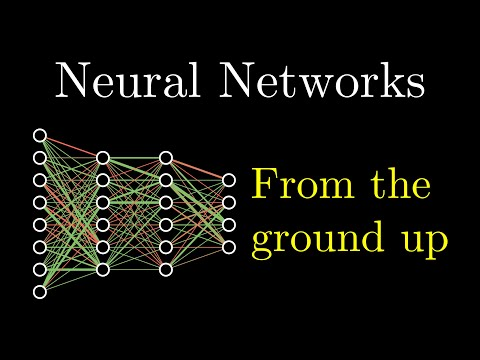

In [745]:
YouTubeVideo('aircAruvnKk', width=800, height=500)

Let wel, voor deze opdracht laten we de sigmoid functie die in de video genoemd wordt achterwege!

Elke overgang van de ene laag naar de andere laag van een neuraal netwerk wordt weergegeven met een matrix, $L_i$  welke de overgang beschrijft van laag $\text{i}$ naar laag $i+1$ in het netwerk. In het onderstaande voorbeeld hebben we 3 lagen: een input laag, één hidden layer en een output laag.

![neural network](neuralnetwork.png)

We hebben nu dus 2 overgangen, oftewel matrices $\mathbf{L_0}$ en $\mathbf{L_1}$. Stel nu dat de input van het netwerk (de waardes van laag 0) wordt gegeven door de vector $\vec{x}$, dan kan de output van het netwerk $\vec{y}$ worden gegeven door:

$$\vec{y} = \mathbf{L_1} (\mathbf{L_0} \vec{x})$$

We hebben gezien dat we de haakjes ook anders mogen zetten: door eerst de twee matrices met elkaar te vermenigvuldigen en het resultaat dan op $\vec x$ toe te passen hoeven we voor iedere nieuwe invoersvector $\vec{x_1} \dots \vec{x_n}$ nog maar één matrixvermenigvuldiging uit te voeren:

$$\vec{y} = (\mathbf{L_1} \mathbf{L_0}) \vec{x}$$

## De opdracht

Voor de eindopdracht van deze week is het de bedoeling om een functie `read_network(filename: str)` te maken die een netwerk in kan lezen vanuit een JSON-bestand (hiervoor zijn twee voorbeelden beschikbaar: `example.json` en `example-2layer.json`). De functie leest de lagen uit de JSON-file in, en maakt matrices voor de veschillende lagen. Als dit er meer dan 1 is worden de lagen onderling vast vermenigvuldigt, zodat er effectief maar een laag nodig is. Tijdens het trainen van een netwerk (wat voor ons al gedaan is) geven de extra lagen mogelijkheid om beter te trainen, maar nu we een getraind model hebben zitten extra lagen vooral in de weg.

Een tweede functie, `run_network(filename: str, input_vector: np.ndarray)` gebruikt `read_network()` en `matrix_multiplication` om de JSON-file niet alleen in te lezen, maar ook toe te passen op de gegeven `input_vector`.

In [746]:
import json

def read_network(filename: str) -> np.ndarray: # TODO
    """Het network word uitgelezen door de json file te lezen. Het maakt gebruik van de naamgevingen.
    Het gaat door elke layer heen en maakt een gepaste grootte matrix aan van nullen. Deze matrix
    wordt gevuld met de correcte waardes gelezen van de weights. Als dit er meer dan 1 
    is worden de lagen onderling vermenigvuldigt"""
    file = open(filename)
    data = json.load(file)
    matrices = []
    
    for layers in data.values():
        return_mat = np.zeros((int(layers['size_in']), int(layers['size_out'])))
        for data_items in layers['weights'].items():
            for item in data_items[1].items():
                return_mat[int(data_items[0])-1][int(item[0])-1] = return_mat[int(data_items[0])-1][int(item[0])-1] + float(item[1])
        matrices.append(return_mat.T)
        
    matrices[0] = matrix_product(matrices[1], matrices[0]) if len(matrices) > 1 else matrices[0]
    return matrices[0]

def run_network(filename: str, input_vector: np.ndarray) -> np.ndarray: # TODO
    """Runt het network door de output matrix te verkrijgen van read_network, dan word bij elke
    rij gekeken geactiveerd moeten worden volgens de input_vector, dit wordt gesommeerd"""
    return np.sum(read_network(filename)[:, input_vector > 0], axis=1)

In [747]:
ac_tests.test_neural_network(read_network, run_network, matrix_product)

### Tests
| **Test** | **Betekenis** |
|---:|:---|
| `test_read_singlelayer` | Het voorbeeld-netwerk met 1 layer wordt goed ingelezen |
| `test_read_duallayer` | Het voorbeeld-netwerk met 2 layers wordt goed ingelezen |
| `test_run_singlelayer` | Het voorbeeld-netwerk met 1 layer wordt goed uitgevoerd |
| `test_run_duallayer` | Het voorbeeld-netwerk met 2 layers wordt goed uitgevoerd |


test_read_duallayer (ac_tests.test_neural_network.<locals>.TestNeuralNetwork) ... ok
test_read_singlelayer (ac_tests.test_neural_network.<locals>.TestNeuralNetwork) ... ok
test_run_duallayer (ac_tests.test_neural_network.<locals>.TestNeuralNetwork) ... ok
test_run_singlelayer (ac_tests.test_neural_network.<locals>.TestNeuralNetwork) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.004s

OK


# Checkpoint Alfa
Als je alles hierboven hebt gemaakt kun je je werk inleveren. Als de testen aangeven dat er nog fouten in zitten, probeer deze dan te verbeteren, maar schroom ook niet om de docent om hulp te vragen als je er niet uitkomt.

Om je werk in te leveren moet je er allereerst voor zorgen dat je Notebook is opgeslagen (ctrl-s of het icoontje in de toolbar). Daarna kun je een Git-commit maken en deze naar je eigen GitHub of GitLab pushen. De link naar je repository is uiteindelijk wat je inlevert op Canvas, om de docent een seintje te geven dat er werk te beoordelen is.

# Unit Bravo

## Opdracht 7 (75p)

Schrijf twee functies om de determinant van een matrix te berekenen: een voor $2 \times 2$ en een voor $3 \times 3$. Gebruik voor de $3 \times 3$ variant de  de [Rule of Sarrus](https://en.wikipedia.org/wiki/Rule_of_Sarrus). Schrijf tot slot een functie die de juiste versie aanroept. Alle drie de functies moeten een `DimensionError` geven:
 - als de matrix niet vierkant is;
 - als de matrix niet exact $2 \times 2$ is (voor `determinant_2()`);
 - als de matrix niet exact $3 \times 3$ is (voor `determinant_3()`) en
 - als de matrix groter is dan $3 \times 3$  (voor `determinant()`).
 
**Probeer zelf met een goed antwoord te komen als een $1\times 1$ matrix wordt meegegeven. Hoeveel groter wordt iets als je het met het gegeven getal vermenigvuldigt?**

In [723]:
def determinant_2(M: np.ndarray) -> int: # TODO
    """Bepaald de determinant van een 2x2 matrix"""
    if M.shape != (2,2):
        raise DimensionError("Vectors niet hetzelfde formaat")
    else:
        det = (M[0][0]*M[1][1]) - (M[1][0]*M[0][1])
        return det

def determinant_3(M: np.ndarray) -> int: # TODO
    """Bepaald de determinant van een 3x3 matrix, gebruikt de rule of sarrus om dit te bepalen"""
    if (M.shape != (3, 3)):
        raise DimensionError("Vectors niet hetzelfde formaat")
    else:
        # rule of sarrus
        M = np.tile(M, 2)
        det = 0
        for i in range(3):
            det += np.prod(M.diagonal(offset=i))
            det -= np.prod(np.flip(M, 0).diagonal(offset=i))
        return det

def determinant(M: np.ndarray) -> int: # TODO
    """Gebruikt de vorige functies om elke determinant te bepalen van maximaal een 3x3 matrix"""
    if (len(M[0]) != len(M)):
        raise DimensionError("Vectors niet hetzelfde formaat")
    elif(M.shape == (1, 1)):
        return M
    elif M.shape == (2, 2):
        return determinant_2(M)
    else:
        return determinant_3(M)

In [724]:
ac_tests.test_determinant(determinant_2, determinant_3, determinant)

### Tests
| **Test** | **Betekenis** |
|---:|:---|
| `test_determinant2_nonzero` | `determinant_2` werkt op omkeerbare $2 \times 2$ matrix (determinant is niet 0) |
| `test_determinant2_zero` | `determinant_2` werkt op onomkeerbare $2 \times 2$ matrix (determinant is 0)  |
| `test_determinant2_invalid` | `determinant_2` handelt foute invoer goed af |
| `test_determinant3_nonzero` | `determinant_3` werkt op omkeerbare $3 \times 3$ matrix (determinant is niet 0)  |
| `test_determinant3_zero` | `determinant_3` werkt op onomkeerbare $3 \times 3$ matrix (determinant is 0) |
| `test_determinant3_invalid` | `determinant_3` handelt foute invoer goed af |
| `test_determinant_scalar` | `determinant` werkt correct op $1 \times 1$ matrix |
| `test_determinant_nonzero2` | `determinant` werkt op omkeerbare $2 \times 2$ matrix (determinant is niet 0)  |
| `test_determinant_nonzero3` | `determinant` werkt op omkeerbare $3 \times 3$ matrix (determinant is niet 0)  |
| `test_determinant_zero2` | `determinant` werkt op onomkeerbare $2 \times 2$ matrix (determinant is 0) |
| `test_determinant_zero3` | `determinant` werkt op onomkeerbare $3 \times 3$ matrix (determinant is 0) |
| `test_determinant_too_large` | `determinant` handelt te grote invoer goed af |
| `test_determinant_invalid` | `determinant` handelt niet-vierkante invoer goed af |


test_determinant2_invalid (ac_tests.test_determinant.<locals>.TestDeterminant) ... ok
test_determinant2_nonzero (ac_tests.test_determinant.<locals>.TestDeterminant) ... ok
test_determinant2_zero (ac_tests.test_determinant.<locals>.TestDeterminant) ... ok
test_determinant3_invalid (ac_tests.test_determinant.<locals>.TestDeterminant) ... ok
test_determinant3_nonzero (ac_tests.test_determinant.<locals>.TestDeterminant) ... ok
test_determinant3_zero (ac_tests.test_determinant.<locals>.TestDeterminant) ... ok
test_determinant_invalid (ac_tests.test_determinant.<locals>.TestDeterminant) ... ok
test_determinant_nonzero2 (ac_tests.test_determinant.<locals>.TestDeterminant) ... ok
test_determinant_nonzero3 (ac_tests.test_determinant.<locals>.TestDeterminant) ... ok
test_determinant_scalar (ac_tests.test_determinant.<locals>.TestDeterminant) ... ok
test_determinant_too_large (ac_tests.test_determinant.<locals>.TestDeterminant) ... ok
test_determinant_zero2 (ac_tests.test_determinant.<locals>.Tes

## Opdracht 8 (75p)
Schrijf een functie de de inverse van een $2\times 2$ matrix berekent. Gebruik hiervoor de determinant-functie die je eerder gemaakt hebt. De functie geeft een `DimensionError` voor een vierkante matrix die niet $2\times 2$ is, en een `NonInvertibleError` voor een $2\times2$ matrix met een determinant van $0$. 

In [725]:
def inverse_matrix_2(M: np.ndarray) -> np.ndarray: # TODO
    """Maakt de inverse van een 2x2 matrix door gebruik te maken van de determinant"""
    if M.shape != (2, 2):
        raise DimensionError("Vector is niet 2X2")
    det = determinant(M)
    if det == 0:
        raise NonInvertibleError("Determinant is 0")
        
    returnmatrix = []
    M[0][0], M[1][1] = M[1][1], M[0][0]
    M[0][1], M[1][0] = -1 * M[0][1], -1 * M[1][0]
    return M/det

In [726]:
ac_tests.test_inverse_2(inverse_matrix_2)

### Tests
| **Test** | **Betekenis** |
|---:|:---|
| `test_inverse2` | Functie werkt voor een inverteerbare $2\times 2$ matrix |
| `test_inverse2_invalid` | Correcte error voor een matrix met verkeerde dimensies |
| `test_inverse2_no_inverse` | Correcte error voor een niet-omkeerbare $2\times 2$ matrix |


test_inverse2 (ac_tests.test_inverse_2.<locals>.TestInverse2) ... ok
test_inverse2_invalid (ac_tests.test_inverse_2.<locals>.TestInverse2) ... ok
test_inverse2_no_inverse (ac_tests.test_inverse_2.<locals>.TestInverse2) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.001s

OK


## Opdracht 9 (90p)
De code voor het inverteren van matrices groter dan $3\times 3$ is wat ingewikkelder, en is daarom hieronder gegeven. Daarbij is ook gelijk een nieuwe versie van de determinant toegevoegd, die ook voor meer dimensies werkt.

1. Neem de functies `sign()`, `submatrix()`, `determinant()` en `cofactor_matrix()` door en probeer te achterhalen wat de code doet. Documenteer daarna deze functies met behulp van de [docstring](https://www.datacamp.com/community/tutorials/docstrings-python#second-head) en commentaar in de code.
2. Schrijf zelf een functie `transpose()` die een matrix om de diagonaal spiegelt, en een functie `inverse_matrix()`. Zorg dat de `inverse_matrix()` functie checkt of een matrix inverteerbaar is, en anders errors oplevert op dezelfde manier als `inverse_matrix_2()` [hierboven](#Opdracht-16).

In [727]:
def sign(x: int) -> int:
    """Als x delen door 2 een geheel getal geeft, krijg 1 returned, anders -1 """
    if x % 2 == 0:
        return 1
    else:
        return -1

def submatrix(M: np.ndarray, x: int, y: int) -> np.ndarray:
    """verwijdert rij x en kolom y en returnt de resultaat"""
    return np.delete(np.delete(M, x, 0), y, 1)

def determinant(M: np.ndarray) -> float:
    """Met behulp van recursion, berekent de determinant mits de matrix vierkant"""
    if M.shape == () or M.shape == (0, 0) or M.shape == (1, 1):
        return M.item() # als de matrix 1X1 is, returnt hij het getal zelf
    elif M.shape[0] != M.shape[1]:
        raise DimensionError("De matrix is niet vierkant")
    else:
        det = 0
        for y in range(M.shape[1]):
            # sign verandert het van een plus naar min
            # aan het eind van recursion heb je 't product van een diagonaal, repeat voor elke diagonaal
            det += sign(y) * M[0][y] * determinant(submatrix(M, 0, y))
        return det

def cofactor_matrix(M: np.ndarray) -> np.ndarray:
    """Geeft de cofactor van een matrix terug"""
    new_matrix = np.zeros((M.shape[0],M.shape[1])) # maakt een matrix met alleen 0'en met dezelfde shape als M
    for x in range(M.shape[0]):
        for y in range(M.shape[1]):
            # elk cijfer verandert in de determinant van de bijbehorende submatrix
            # dus de 0 op plaats 2,3 in adj heeft een submatrix, dat M is zonder rij 2 en kolom 3
            # de determinant daarvan word in plaats van de 0 gezet
            new_matrix[x][y] = sign(abs(x-y)) * determinant(submatrix(M, x, y)) 
    return new_matrix

def transpose(M: np.ndarray) -> np.ndarray: # TODO
    """Transposeerd M, door M te spiegelen over de lijn van linksboven naar rechtsonder"""
    new_matrix = np.zeros((M.shape[1], M.shape[0]))
    for i in range(0, len(M)):
        for j in range(0, len(M[0])):
                new_matrix[j][i] = M[i][j] 
    return new_matrix

def inverse_matrix(M: np.ndarray) -> np.ndarray: # TODO
    """Berekent de inversie van een vierkant matrix met een determinant > 0"""
    if (len(M) != len(M[0])):
        raise DimensionError("De matrix is niet vierkant")
    if determinant(M) == 0:
        raise NonInvertibleError("Determinant is 0")
        
    det = determinant(M)
    M = cofactor_matrix(M)
    M = transpose(M)
    return M/det
        
    
        

In [728]:
ac_tests.test_inverse_(inverse_matrix, transpose)

### Tests
| **Test** | **Betekenis** |
|---:|:---|
| `test_transpose` | Tranpose functie werkt op zichzelf voor een $3\times 2$ test-matrix |
| `test_inverse` | Functie werkt voor een inverteerbare $4\times 4$ test-matrix |
| `test_inverse_invalid` | Correcte error voor een matrix met verkeerde dimensies |
| `test_inverse_no_inverse` | Correcte error voor een niet-omkeerbare vierkante matrix |

test_inverse (ac_tests.test_inverse_.<locals>.TestInverse) ... ok
test_inverse_invalid (ac_tests.test_inverse_.<locals>.TestInverse) ... ok
test_inverse_no_inverse (ac_tests.test_inverse_.<locals>.TestInverse) ... ok
test_transpose (ac_tests.test_inverse_.<locals>.TestInverse) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.006s

OK


## Opdracht 10 (60p)
Magische vierkant zijn vierkanten bestaande uit getallen waarbij de sommen van de getallen op de rijen, kolommen en diagonalen allemaal hetzelfde is, bijvoorbeeld:

$$\begin{array}{|c|c|c|}
\hline
8 & 3 & 4 \\ \hline
1 & 5 & 9 \\ \hline
6 & 7 & 2 \\ \hline
\end{array}$$

Hierbij is de som van alle rijen, kolommen en diagonalen gelijk aan 15.
Een ander voorbeeld met waarbij alleen gebruik wordt gemaakt van priemgetallen is deze (met de som gelijk aan 177):

$$\begin{array}{|c|c|c|}
\hline
101 & 5 & 71 \\ \hline
29 & 59 & 89 \\ \hline
47 & 113 & 17 \\ \hline
\end{array}$$

Natuurlijk kunnen er ook grotere vierkanten worden gemaakt, zoals het onderstaande (zeer bekende) magische vierkant:
$$\begin{array}{|c|c|c|c|}
\hline
16 & 3 & 2 & 13 \\ \hline
5 & 10 & 11 & 8 \\ \hline
9 & 6 & 7 & 12 \\ \hline
4 & 15 & 14 & 1 \\ \hline
\end{array}$$

Er zijn allerlei verschillende manier om deze vierkanten te maken, maar voor ons is het interessanter om te kijken of, en zo ja hoe, je een oplossing kan vinden gegeven een aantal waardes. Neem bijvoorbeeld het onderstaande gegeven vierkant:

$$\begin{array}{|c|c|c|}
\hline
   5 &  ~~ & ~~  \\ \hline
~~  &  ~~ &  4  \\ \hline
~~  & ~~  &  6   \\ \hline
\end{array}$$

De vraag is nu: wat zijn de getallen die in de lege vakjes moeten worden ingevuld?

### Opdracht
Om een algemeen probleem als dit op te lossen is het nodig om deze vraagstelling om te schrijven in een stelsel vergelijken. Om effectief een oplossing te kunnen construeren is het nodig om dit stelsel vergelijkingen te beschrijven in matrix-vector vorm: 

$$\mathbf{A} \vec{x} = \vec{b}$$

Daarna kan je dit stelsel vergelijkingen oplossen door middel van verschillende methodes, zoals Gauss-Jordan eliminatie en (pseudo)inverse matrices. Omdat we hier met een matrix van $8\times 9$ of zelfs $9 \times 10$ te maken hebben gaan we het handwerk met Gauss-Jordan overslaan, en vertrouwen we op de computer om dit voor ons te doen.

Schrijf een functie die, gegeven een lijst van gegeven waardes `[lb, b, rb, l, m, r, lo, o, ro]` een matrix-vector vergelijking opstelt en oplost om het magische vierkant verder in te vullen. De functie gebruikt de determinant / rank om uit te zoeken of een oplossing mogelijk is. 

Je kunt de volgende NumPy functies gebruiken (deze hebben we niet zelf geschreven, omdat om deze te berekenen meer wiskundig inzicht nodig is, en dat is lastig aan een computer uit te leggen):
 - `np.linalg.pinv()`
 - `np.linalg.matrix_rank()`

Naast het programmeren moet je ook je aanpak beschrijven, indien gebruikt met verwijzing naar geraadpleegde bronnen buiten het studiemateriaal. 

**Let op:** voor deze opdracht is het niet nodig dat de oplossing bestaat uit gehele getallen. Er mogen dus breuken of komma-getallen gebruikt worden. Je mag de aanname doen dat de som van een rij, kolom of diagonaal gelijk is aan drie keer de waarde van het middelste vakje.

<div style="background: rgba(255,255,128,0.4); padding: 5px">

### Toelichting aanpak magische vierkanten
Vind de magische vierkant door eerst de middelste cijfer uit te zoeken, daarmee weten we
ook wat elke rij bijelkaar zou moeten zijn. We vinden de middelste nummer door te kijken naar een rij met 2 cijfers aan elke eind, het gemmidelde van deze 2 cijfers is altijd wat in het midden moet (als we ervan uit gaaan dat de middelste cijfer dus 3X de verwachte som is). Hierna worden de overige cijfers berekent door bij elke rij met 2 cijfers de laatste te berekenen. Dit doen we door de 2 cijfers bijelkaar op te tellen en het van de berekende sommerings nummer af te halen.
</div>

In [731]:
# Je kan latex_msquare gebruiken om een magisch vierkant van 3 bij 3 te printen, bijvoorbeeld:
latex_msquare(np.array(((8,3,4),(1,5,9),(6,7,2))))

input = np.array(((5, 0, 0),
                  (0, 0, 4),
                  (0, 0, 6)))

"""vind de magische vierkant door eerst de middelste cijfer uit te zoeken, daarmee weten we
ook wat elke rij bijelkaar zou moeten zijn. Hierna worden de overige cijfers berekent door
bij elke rij met 2 cijfers de laatste te berekenen. Dit doen we door de 2 cijfers bijelkaar
op te tellen en het van de berekende sommerings nummer af te halen."""
def magisch_vierkant(gegeven_getallen: np.ndarray) -> np.ndarray:
    # Calculate middle number and find expected sum
    gegeven_getallen = gegeven_getallen.astype('float64')
    rot_gegeven_getallen = gegeven_getallen[::-1,::-1]
    for i in range(len(gegeven_getallen)):
        for j in range(len(gegeven_getallen[i])):
            if gegeven_getallen[i][j] and rot_gegeven_getallen[i][j] and i*j != 1:
                # The middle number is always half the sum of the 2 numbers on its ends
                gegeven_getallen[1][1] = (gegeven_getallen[i][j] + rot_gegeven_getallen[i][j]) / 2
                exp_sum = gegeven_getallen[1][1] * 3
                break
                
    # solve rest of square
    # go over every row, column and diagonal and find which one is solvable
    while(np.count_nonzero(gegeven_getallen == 0) > 0):
        for row in gegeven_getallen:
            if(np.count_nonzero(row == 0) == 1):
                index = np.where(row == 0)
                row[index] = exp_sum - np.sum(row)
        for column in gegeven_getallen.T:
            if(np.count_nonzero(column == 0) == 1):
                index = np.where(column == 0)
                column[index] = exp_sum - np.sum(column)
        for diag in [gegeven_getallen.diagonal(), np.fliplr(gegeven_getallen).diagonal()]:
            if(np.count_nonzero(diag == 0) == 1):
                diag.setflags(write=1)  # numpy diagonals zijn blijkbaar non-writable bij default
                index = np.where(diag == 0)
                diag[index] = exp_sum - np.sum(diag)#2

    return gegeven_getallen
    

<IPython.core.display.Math object>

<details><pre>$\begin{array}{|c|c|c|}\hline   8 & 3 & 4\\\hline   1 & 5 & 9\\\hline   6 & 7 & 2\\\hline \end{array}$</pre></details>

In [732]:
ac_tests.test_magisch_vierkant(magisch_vierkant)

### Tests
`test_integer`:
$$\begin{array}{|c|c|c|}\hline   0 & 3 & 4\\\hline   0 & 0 & 0\\\hline   0 & 7 & 0\\\hline \end{array} \mapsto \begin{array}{|c|c|c|}\hline   8 & 3 & 4\\\hline   1 & 5 & 9\\\hline   6 & 7 & 2\\\hline \end{array}$$

`test_rational`:
$$\begin{array}{|c|c|c|}\hline   5 & 0 & 0\\\hline   0 & 0 & 4\\\hline   0 & 0 & 6\\\hline \end{array} \mapsto
\begin{array}{|c|c|c|}\hline   5 & 5 & 6.5\\\hline   7 & 5.5 & 4\\\hline   4.5 & 6 & 6\\\hline \end{array}$$

test_integer (ac_tests.test_magisch_vierkant.<locals>.TestMagischVierkant) ... ok
test_rational (ac_tests.test_magisch_vierkant.<locals>.TestMagischVierkant) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.002s

OK


# Checkpoint Bravo
Als je alles hierboven hebt gemaakt kun je je werk inleveren. Als de testen aangeven dat er nog fouten in zitten, probeer deze dan te verbeteren, maar schroom ook niet om de docent om hulp te vragen als je er niet uitkomt.

Om je werk in te leveren moet je er allereerst voor zorgen dat je Notebook is opgeslagen (ctrl-s of het icoontje in de toolbar). Daarna kun je een Git-commit maken en deze naar je eigen GitHub of GitLab pushen. De link naar je repository is uiteindelijk wat je inlevert op Canvas, om de docent een seintje te geven dat er werk te beoordelen is.